In [1]:
import tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv('ushape.csv')

In [5]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


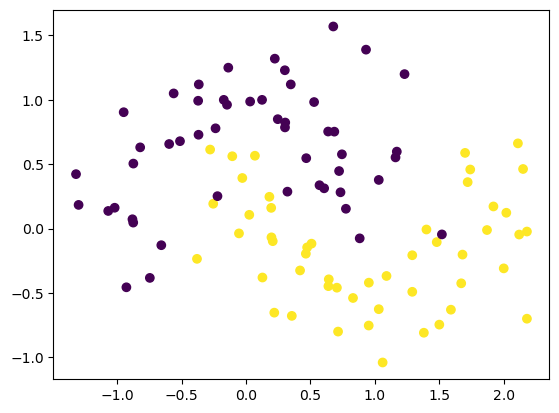

In [6]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [7]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [8]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Set parameters to 0
model.get_weights()

[array([[-0.5058764 ,  0.02204025],
        [ 0.6392802 , -0.31327194]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.9948281],
        [-0.5278468]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights = model.get_weights()

In [21]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.8
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.8
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.8
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.8

In [22]:
model.set_weights(initial_weights)

In [23]:
model.get_weights()

[array([[0.8, 0.8],
        [0.8, 0.8]], dtype=float32),
 array([0.8, 0.8], dtype=float32),
 array([[0.8],
        [0.8]], dtype=float32),
 array([0.8], dtype=float32)]

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history = model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 82ms/step - loss: 7.1496 - accuracy: 0.5000 - val_loss: 5.6260 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 7.1452 - accuracy: 0.5000 - val_loss: 5.6176 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 7.1381 - accuracy: 0.5000 - val_loss: 5.6115 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 7.0057 - accuracy: 0.5000 - val_loss: 5.6048 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 6.9930 - accuracy: 0.5000 - val_loss: 5.5989 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 6.8777 - accuracy: 0.5000 - val_loss: 5.5942 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 6.8493 - accuracy: 0.5000 - val_loss: 5.5904 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 16ms/step - loss: 6.6137 - accuracy: 0.5000 - val_loss: 5.5476 - val_accuracy: 0.5000
Epoch 60/100
3/3 [==============================] - 0s 16ms/step - loss: 6.6132 - accuracy: 0.5000 - val_loss: 5.5474 - val_accuracy: 0.5000
Epoch 61/100
3/3 [==============================] - 0s 17ms/step - loss: 6.6127 - accuracy: 0.5000 - val_loss: 5.5471 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 0s 21ms/step - loss: 6.6121 - accuracy: 0.5000 - val_loss: 5.5469 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 0s 22ms/step - loss: 6.6116 - accuracy: 0.5000 - val_loss: 5.5466 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 0s 20ms/step - loss: 6.6112 - accuracy: 0.5000 - val_loss: 5.5464 - val_accuracy: 0.5000
Epoch 65/100
3/3 [==============================] - 0s 19ms/step - loss: 6.6106 - accuracy: 0.5000 - val_loss: 5.5461 - val_accuracy: 0.5000
Epoch 66/100
3/3 [========

In [16]:
model.get_weights()

[array([[0.85104054, 0.85104054],
        [0.7855867 , 0.7855867 ]], dtype=float32),
 array([0.7534992, 0.7534992], dtype=float32),
 array([[0.76261693],
        [0.76261693]], dtype=float32),
 array([0.74767995], dtype=float32)]

In [17]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [18]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 6s 626us/step


<AxesSubplot:>

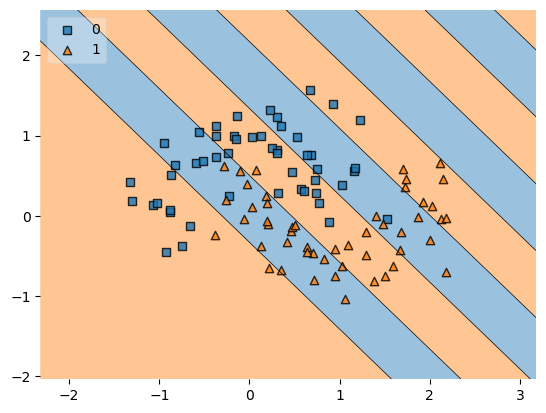

In [19]:
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)